In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc

[[0.08744530929828877, 0.08744530929828877, 0.08744530929828877, 0.08744530929828877, 0.08744530929828877], [0.020289610809633582, 0.020289610809633582, 0.020289610809633582, 0.020289610809633582, 0.020289610809633582], [0.017395048271355452, 0.017395048271355452, 0.017395048271355452, 0.017395048271355452, 0.017395048271355452], [0.044476318368632944, 0.044476318368632944, 0.044476318368632944, 0.044476318368632944, 0.044476318368632944], [0.06608749658196418, 0.06608749658196418, 0.06608749658196418, 0.06608749658196418, 0.06608749658196418], [0.08434392381356268, 0.08434392381356268, 0.08434392381356268, 0.08434392381356268, 0.08434392381356268], [0.09990911338693172, 0.09990911338693172, 0.09990911338693172, 0.09990911338693172, 0.09990911338693172], [0.1142536762903327, 0.1142536762903327, 0.1142536762903327, 0.1142536762903327, 0.1142536762903327], [0.1273272419904813, 0.1273272419904813, 0.1273272419904813, 0.1273272419904813, 0.1273272419904813], [0.13939486115831376, 0.1393948

ValueError: x and y must have same first dimension, but have shapes (5,) and (4,)

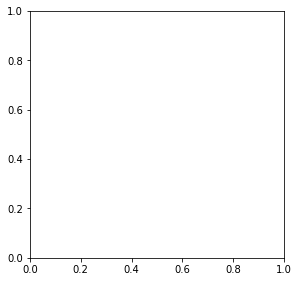

In [15]:

class MyRandom():
    
    def __init__(self, seed = 15, method='simple'):
        
        self.r = seed
        self.method = method
        
        if method=='simple':
            self.a = 57
            self.c = 1
            self.M = 265
        elif method == 'drand48':
            self.a = int('5DEECE66D',16)
            self.c = int('B',16)
            self.M = 2**48
        else:
            print('Generador no reconocido')
            
    def Random(self):
        
        r = (self.a*self.r + self.c)%self.M
        self.r = r
        
        return r/float(self.M)
    
    def TestMethod(self, Npoints, moment, seed_ = 32, method_ = 'simple'):
        
        rand = MyRandom(seed = seed_, method = method_)
        
        array = np.zeros(Npoints)
            
        for i in range(Npoints):
            array[i] = rand.Random()
            
        return np.sqrt(Npoints)* np.abs(  np.mean(array**moment) - 1./(1.+moment) )
#U = np.random.uniform( 0,10, 10000 )
#Pois = np.random.poisson(size=10000)
#Normal = np.random.standard_normal(size = 10000)
#print(len(U),len(Pois),len(Normal),len(x))

rand = MyRandom#(seed = 6625, method='drand48')

#print(type(rand))
#print(rand.Random())

Points = np.logspace(2,6,5)

rand_a = np.random.rand(10,5)
randa = rand_a.tolist()
NMoments = 10

Moments1 = []
Moments2 = []

for k in range(NMoments):
    
    test1 = []
    test2 = []
    
    for i in range(len(Points)):
        test1.append(rand.TestMethod(int(Points[i]),k+1,16))
        test2.append(rand.TestMethod(int(Points[i]),k+1,96))
        
    Moments1.append(test1)
    Moments2.append(test2)
print(Moments1,Moments2)

NMoments = 10
#Moments = np.random.uniform(0,NMoments,(NMoments,5))
#rand_a = np.random.uniform(0,NMoments,(10,5))
rand_a = np.random.rand(10,5)
rand = rand_a.tolist()
Moments = []
for k in range(NMoments):
    test = []
    for i in range(1,len(rand[k])):
        test.append((np.sqrt(NMoments)/np.abs((np.sqrt(NMoments)*rand[k][i])-1))-1)  
    Moments.append(test)
    test=[]
Moments=np.array(Moments)

labelk = []
for i in range(NMoments):
    labelk.append(i+1)
print(len(Points),len(Moments))

fig = plt.figure( figsize=(10,10) )
ax1 = fig.add_subplot(2,2,1)
for i in range(NMoments):
    ax1.plot(Points,Moments[i], label=r'$k=%.0f$' %(labelk[i]))
    
ax1.set_xscale('log')
ax1.set_xlabel('N Points', fontsize=15)
ax1.set_ylabel('k-moment value', fontsize=15)
ax1.legend()

**2.1**

  0%|          | 2/100000 [00:00<36:18, 45.89it/s]
No handles with labels found to put in legend.


2


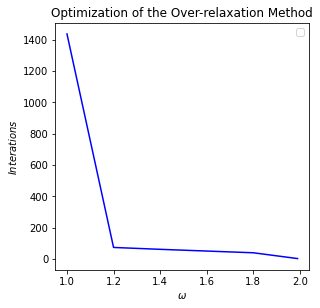

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
from tqdm import tqdm

# Discretizamos el espacio
Xmin, Xmax, NpointsX = 0.,40.,71
Ymin, Ymax, NpointsY = 0.,40.,71

x = np.linspace(Xmin,Xmax,NpointsX)
y = np.linspace(Xmin,Xmax,NpointsY)


def h1(y):
    return 75.

def h2(y):
    return 50.

def h3(x):
    return 100.

def h4(x):
    return 0.

def InitT():
    
    T = np.zeros( (NpointsX,NpointsY) )
    
    # Fijando las fronteras
    T[0,:] = h1(y)
    T[-1,:] = h2(y)
    
    T[:,0] = h3(x)
    T[:,-1] = h4(x)
    
    return T
def GetRelaxation(T, Nit = int(1e5), omega = 1.3, tolerancia = 1e-2):
    
    itmax = 0
    
    for it in tqdm( range(Nit) ):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                tmp = 0.25*( T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1] )
                r = (tmp - T[i,j]) # Calculo la distancia entre j y j-1
                
                T[i,j] += omega*r # Actualizar la matriz
                
                if np.abs(r) > dmax:
                    dmax = r
                    
        if np.abs(dmax) < tolerancia:
            itmax = it
            break
            
    return itmax

T = InitT()
v = [1.,1.2,1.4,1.6,1.8,1.99]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
its = []
for  i in v:
    itmax = GetRelaxation(T, omega = i) 
    its.append(itmax)
print(itmax)
ax.plot(v,its,'b')
ax.set_title('Optimization of the Over-relaxation Method')
ax.set_xlabel('$\omega$', fontsize=10)
ax.set_ylabel('$Interations$', fontsize=10)
